In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHs=50

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("PlantVillage",shuffle=True,image_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [4]:
class_name=dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
print(dataset.take(1))

<TakeDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>


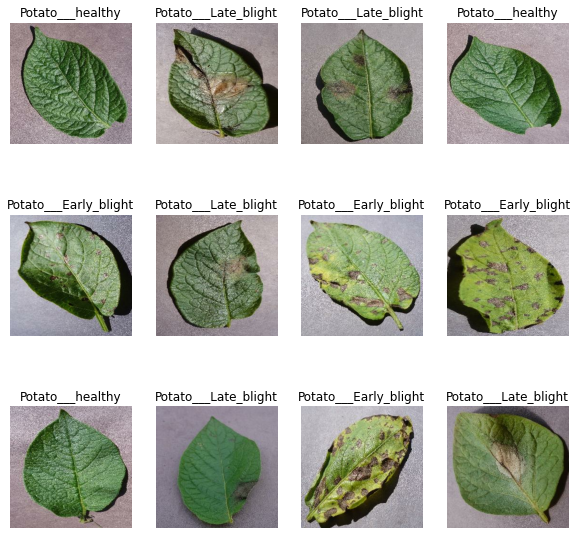

In [7]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis('off')

In [8]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [9]:
train_ds=dataset.take(54)
test_ds=dataset.skip(54)

In [10]:
len(train_ds)

54

In [11]:
len(test_ds)

14

In [12]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds=test_ds.take(6)

In [14]:
len(val_ds)

6

In [15]:
test_ds=test_ds.skip(6)

In [16]:
len(test_ds)

8

In [17]:
def get_dataset_partition_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [18]:
train_ds,val_ds,test_ds=get_dataset_partition_tf(dataset)

In [19]:
len(train_ds)

54

In [20]:
len(val_ds)

6

In [21]:
len(test_ds)

8

In [29]:
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds= val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds= test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [32]:
resize_and_rescale=tf.keras.Sequential([layers.experimental.preprocessing.Rescaling(IMAGE_SIZE,IMAGE_SIZE),layers.experimental.preprocessing.Rescaling(1.0/255.0)])
#we are doing rescaling because if my data is not in 256*256, it will eventually resize it

In [39]:
data_augmentation=tf.keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),layers.experimental.preprocessing.RandomRotation(0.2)])
#data augmentation is used fr creating different variant of the same image by changinng the contrast, flip etc

In [45]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),#input_shape is used only for first layer
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),#First dense layer with 64 neurons
    layers.Dense(n_classes,activation='softmax')#Second dense layer with 3 neurons and softmax will normalize the probability of all the ouput
])
model.build(input_shape=input_shape)

In [46]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_5 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (32, 60, 60, 64)         

In [47]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics = ['accuracy'])

In [48]:
history=model.fit(train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,)

Epoch 1/50
54/54 [==============================] - 161s 3s/step - loss: 1.7731 - accuracy: 0.5463 - val_loss: 0.6880 - val_accuracy: 0.6979
Epoch 2/50
54/54 [==============================] - 145s 3s/step - loss: 0.6733 - accuracy: 0.7205 - val_loss: 0.5928 - val_accuracy: 0.7240
Epoch 3/50
54/54 [==============================] - 150s 3s/step - loss: 0.4081 - accuracy: 0.8374 - val_loss: 0.2480 - val_accuracy: 0.9062
Epoch 4/50
54/54 [==============================] - 137s 3s/step - loss: 0.3189 - accuracy: 0.8594 - val_loss: 0.3205 - val_accuracy: 0.8906
Epoch 5/50
54/54 [==============================] - 137s 3s/step - loss: 0.3363 - accuracy: 0.8611 - val_loss: 0.2232 - val_accuracy: 0.9323
Epoch 6/50
54/54 [==============================] - 144s 3s/step - loss: 0.2179 - accuracy: 0.9086 - val_loss: 0.2129 - val_accuracy: 0.9271
Epoch 7/50
54/54 [==============================] - 147s 3s/step - loss: 0.1551 - accuracy: 0.9398 - val_loss: 0.2673 - val_accuracy: 0.8958
Epoch 8/50
54

In [49]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 4s 505ms/step - loss: 0.0247 - accuracy: 0.9914


In [50]:
scores

[0.024673884734511375, 0.9913793206214905]

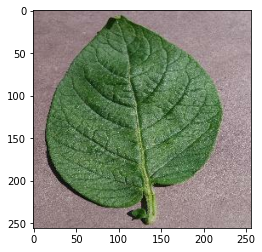

In [52]:
for images_batch, labels_batch in test_ds.take(1):
    plt.imshow(images_batch[0].numpy().astype('uint8'))

first image to predict
actual label: Potato___healthy
predicted label: Potato___healthy


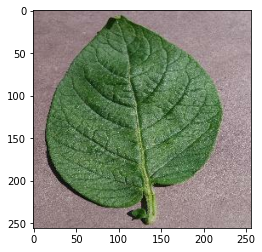

In [74]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])

In [116]:
def predict_model(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

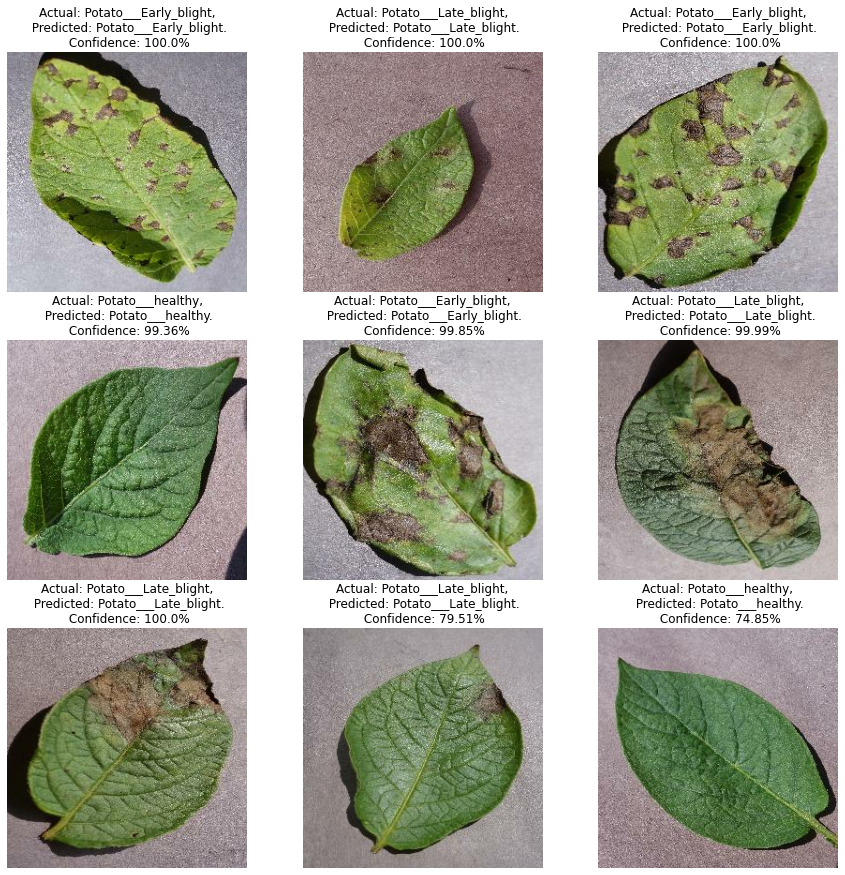

In [117]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict_model(model, images[i].numpy())
        actual_class = class_name[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")